In [4]:
%matplotlib inline

from hbam import complexity

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In the following we perform a simple hierarchical bitmap encoding of the adjacency matrix to measure the complexity of the network. The concept of the hierarchical bitmap encoding is presented in the figure below:

![hbam](hbam.png)

Consider the adjacency matrix flattened to a 1-D binary array. This array is divided into eqally sized signatures (preferably, the size of the signature is the same as the size of the machine word). We add additional level on top of base signatures, where each bit represents a single signature on the lower level. If the signature is non-empty, the bit is set to 1, otherwise it is set to 0. We add bitmap levels recursively until a single signature is reached. We encode each signature as an integer, and, **most importantly**, we store in the final representation, only **non-empty** signatures, starting with the root of the hierarchical bitmap tree. This representation is both compact and unique in the sense that it uniquely represents the base sequence of signatures.

For the hierarchical bitmap presented in the figure above, the final representation would be: `10 11 4 6 9 12 5`

## Algorithmic complexity of a network based on hierarchical bitmap encoding

The complexity of the network is defined as the ratio of the length of the hierarchical bitmap encoding of the adjacency matrix to the length of the original adjacency matrix. If a given adjacency matrix can be successfully compressed using hierarchical bitmap encoding, it is deemed simple.

## Random network model

In [5]:
results = list()

for i in np.arange(0, 1, 0.01):

    g = nx.erdos_renyi_graph(n=100, p=i)
    a = np.array(nx.adjacency_matrix(g).todense())
    _complexity, _embedding = complexity(a, signature_size=8)
    results.append((i, nx.density(g), _complexity))

df = pd.DataFrame(results, columns=['i','density','complexity'])
df = df.melt(id_vars='i', value_vars=['density','complexity'])


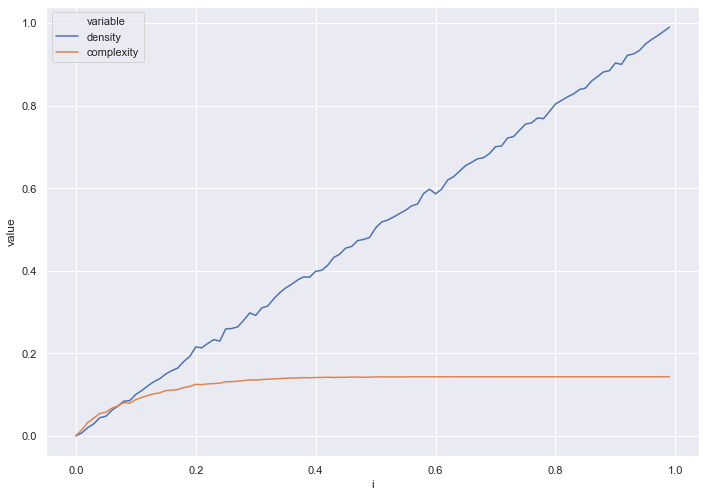

In [6]:
sns.lineplot(x=df.i, y=df.value, hue=df.variable)
plt.show()

As the network becomes denser, the complexity of the network initially increases, but only to a certain degree. After reaching a saturation point (where the network has a single connected component wired randomly) addition of new edges does not increase the complexity of the network. We see that the complexity measure is not a function of network density.

## Small world model

In [7]:
results = list()

for i in np.arange(0, 1, 0.01):

    g = nx.watts_strogatz_graph(n=100, k=4, p=i)
    a = np.array(nx.adjacency_matrix(g).todense())
    _complexity, _embedding = complexity(a, signature_size=8)
    results.append((i, nx.density(g), _complexity))

df = pd.DataFrame(results, columns=['i','density','complexity'])
df = df.melt(id_vars='i', value_vars=['density','complexity'])


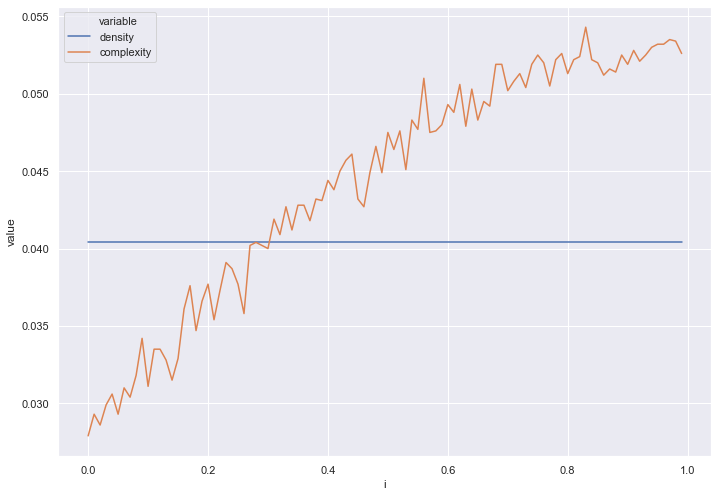

In [8]:
sns.lineplot(x=df.i, y=df.value, hue=df.variable)
plt.show()

Initially the network is simple due to a very regular pattern of 0s and 1s in the adjacency matrix. As we randomly rewire more and more edges, the complexity of the network increases almost linearly with the number of rewired edges. Here we do not add any new edges so the density of the network remains constant, yet the complexity measure captures the change in the patterns present in the adjacency matrix.

## Power law

In [9]:
results = list()

for i in np.arange(1, 10, 1):

    g = nx.barabasi_albert_graph(n=100, m=i)
    a = np.array(nx.adjacency_matrix(g).todense())
    _complexity, _embedding = complexity(a, signature_size=8)
    results.append((i, nx.density(g), _complexity))

df = pd.DataFrame(results, columns=['i','density','complexity'])
df = df.melt(id_vars='i', value_vars=['density','complexity'])

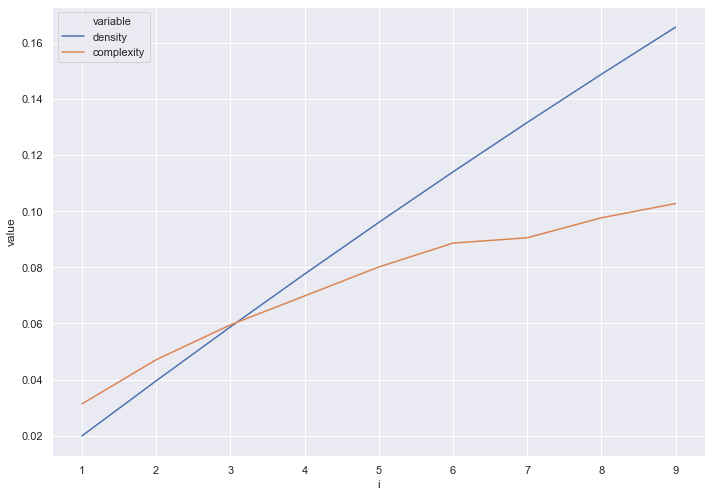

In [10]:
sns.lineplot(x=df.i, y=df.value, hue=df.variable)
plt.show()

In this experiment we generate power-law network, modifying the number of edges created by newly added vertices. Of course, given the constant number of vertices, the density of the network grows linearly with the increase in the out-degree of vertices. The complexity of the network grows sub-linearly with the density of the network.

## Stability of complexity

We want to verify if the measure of complexity depends on random permutations of the input binary sequence. To this end we generate long binary sequences with varying proportion of 0's and 1's and for each proportion we generate 50 permutations of the sequence. We see that the variance of complexity is minimal.

In [11]:
results = list()

for i in np.arange(0.00, 1.00, 0.01):
    
    a = np.random.choice([0,1], size=100, p=[1-i, i]).reshape(10,10)
    
    for _ in range(50):
        np.random.shuffle(a)
        _complexity, _embedding = complexity(a, signature_size=8)
        results.append((i, _complexity))
        
df = pd.DataFrame(results, columns=['i','complexity'])

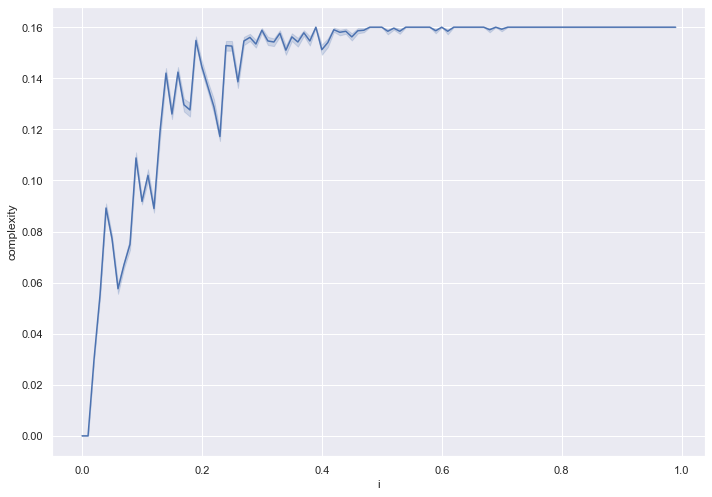

In [12]:
sns.lineplot(x='i', y='complexity', data=df)

In [13]:
print(f'Average variance for each proportion: {df.groupby(df.i).var().mean()}')

Average variance for each proportion: complexity    0.00002
dtype: float64
